In [9]:
import pandas as pd

In [10]:
penguins = pd.read_csv('penguins.csv', index_col=False)

In [11]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Remover valores faltantes

In [12]:
data = penguins.dropna()
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# One Hot Encoding

In [13]:
ohe_island = pd.get_dummies(data.island).astype(int)
ohe_island = ohe_island.iloc[:, :-1]
ohe_island

,Biscoe,Dream
0,0,0
1,0,0
2,0,0
4,0,0
5,0,0
...,...,...
339,0,1
340,0,1
341,0,1
342,0,1


In [14]:
ohe_sex = pd.get_dummies(data.sex).astype(int)
ohe_sex = ohe_sex.iloc[:, :-1]
ohe_sex


,female
0,0
1,1
2,1
4,1
5,0
...,...
339,0
340,1
341,0
342,0


In [15]:
X = pd.concat([data.drop(['species', 'island', 'sex'], axis=1), ohe_sex, ohe_island], axis=1)
y = data['species']

In [16]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,female,Biscoe,Dream
0,39.1,18.7,181.0,3750.0,2007,0,0,0
1,39.5,17.4,186.0,3800.0,2007,1,0,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0
5,39.3,20.6,190.0,3650.0,2007,0,0,0
...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,0,0,1
340,43.5,18.1,202.0,3400.0,2009,1,0,1
341,49.6,18.2,193.0,3775.0,2009,0,0,1
342,50.8,19.0,210.0,4100.0,2009,0,0,1


In [17]:
y

0         Adelie
1         Adelie
2         Adelie
4         Adelie
5         Adelie
         ...    
339    Chinstrap
340    Chinstrap
341    Chinstrap
342    Chinstrap
343    Chinstrap
Name: species, Length: 333, dtype: object

# Split train test data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo

In [20]:
from sklearn.svm import SVC

In [21]:
svm = SVC()

In [22]:
svm.fit(X_train, y_train)

SVC()

# Avaliando o modelo

In [23]:
from sklearn.metrics import classification_report

In [24]:
y_pred = svm.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.60      0.87      0.71        31
   Chinstrap       0.00      0.00      0.00        18
      Gentoo       0.82      1.00      0.90        18

    accuracy                           0.67        67
   macro avg       0.47      0.62      0.54        67
weighted avg       0.50      0.67      0.57        67



C:\Users\guido.mainardi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\guido.mainardi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\guido.mainardi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metr

# Melhorando o Modelo

In [27]:
from  sklearn.model_selection import GridSearchCV

In [28]:
param_grid = { 'C': [0.1, 1, 10, 100],
               'gamma': [1, 1e-1, 1e-2, 1e-3],
               'kernel': ['rbf', 'poly', 'sigmoid']}

In [29]:
grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True, verbose=2, cv=10)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=

C:\Users\guido.mainardi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\guido.mainardi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\guido.mainardi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'simoid']},
             verbose=2)

In [30]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=0.1, kernel='poly')


# Validando o novo modelo

In [31]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        18
      Gentoo       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



## modelo anterior

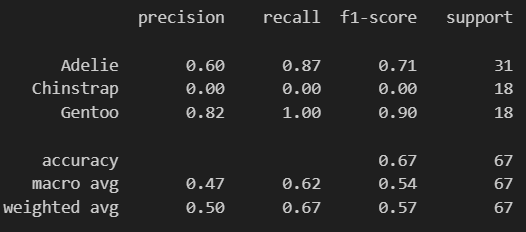